In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# local

# benchmark

In [13]:
data = pd.read_csv('run_results_bivarate.csv')
# only pick method not Lingam
data = data[data['Method'] != 'lingam']
# only pick noise rate 0.01, 0.1, 0.2 and 0.3
data = data[data['Noise_Rate'].isin([0.01, 0.1, 0.2, 0.3])]
data.head()

,Dataset,Noise_Type,Noise_Rate,Method,Causality
0,pair0070,instance,0.01,fci,anticausal
1,pair0070,sym,0.01,fci,anticausal
2,pair0070,pair,0.01,fci,anticausal
3,pair0070,instance,0.10,fci,anticausal
4,pair0070,sym,0.10,fci,anticausal


In [14]:

# replace unkown with Unknown
#data['Causality'] = data['Causality'].replace('Unkown', 'Unknown')
#data['Dataset']= data['Dataset'].replace('G241c', 'g241c')
# replace values in Dataset column and Causality with first letter captalized


# Replace NaN with Unknown
data['Causality'] = data['Causality'].fillna('Unknown')


data['Dataset'] = data['Dataset'].str.capitalize()
data['Causality'] = data['Causality'].str.capitalize()
# replace Method column values with all letter captalized
data['Method'] = data['Method'].str.upper()



# if values in Dataset is not in the list, add 'AntiCausal' to their names
data['Dataset'] = np.where(~data['Dataset'].isin(['Krkp', 'Secstr', 'Splice']), data['Dataset']+' (anticausal)', data['Dataset'])

data['Dataset'] = np.where(data['Dataset'].isin(['Krkp', 'Secstr', 'Splice']), data['Dataset']+' (causal)', data['Dataset'])


data.head()


,Dataset,Noise_Type,Noise_Rate,Method,Causality
0,Pair0070 (anticausal),instance,0.01,FCI,Anticausal
1,Pair0070 (anticausal),sym,0.01,FCI,Anticausal
2,Pair0070 (anticausal),pair,0.01,FCI,Anticausal
3,Pair0070 (anticausal),instance,0.10,FCI,Anticausal
4,Pair0070 (anticausal),sym,0.10,FCI,Anticausal


In [15]:

# Group data by Dataset and Method

# Create a pivot table with a multi-level column structure
pivot_table = data.pivot_table(
    index=['Dataset', 'Method'],
    columns=['Noise_Type', 'Noise_Rate'],
    values='Causality',
    aggfunc='first'
)

# Print the resulting DataFrame
print(pivot_table)

# Output the pivot_table in LaTeX format
latex_output = pivot_table.to_latex()

# Save the LaTeX output to a file
with open("output_pivot_table.tex", "w") as text_file:
    text_file.write(latex_output)


Noise_Type                      instance                                      \
Noise_Rate                          0.01        0.10        0.20        0.30   
Dataset               Method                                                   
Pair0047 (anticausal) CI          Unkown      Unkown      Unkown      Unkown   
                      FCI     Anticausal  Anticausal  Anticausal  Anticausal   
                      ICD     Anticausal  Anticausal  Anticausal  Anticausal   
                      RAI         Unkown      Unkown      Unkown      Unkown   
Pair0070 (anticausal) CI          Unkown      Unkown      Unkown      Unkown   
                      FCI     Anticausal  Anticausal  Anticausal  Anticausal   
                      ICD     Anticausal  Anticausal  Anticausal  Anticausal   
                      RAI         Unkown      Unkown      Unkown      Unkown   
Pair0071 (anticausal) CI      Anticausal  Anticausal  Anticausal  Anticausal   
                      FCI     Anticausal

/var/folders/z8/zm1gct552gb8700n_kq3pm9h0000gn/T/ipykernel_27641/308080304.py:15: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_output = pivot_table.to_latex()


Noise_Type                          instance                          \
Noise_Rate                              0.01        0.20        0.40   
Dataset                   Method                                       
Breastcancer (anticausal) GES     Anticausal  Anticausal      Unkown   
                          GIES    Anticausal  Anticausal      Unkown   
                          LINGAM      Unkown      Unkown      Unkown   
                          PC      Anticausal  Anticausal      Unkown   
G241c (anticausal)        GES     Anticausal  Anticausal         NaN   
                          GIES    Anticausal  Anticausal         NaN   
                          LINGAM      Unkown      Unkown         NaN   
                          PC      Anticausal      Unkown         NaN   
Iris (anticausal)         GES     Anticausal      Causal      Causal   
                          GIES    Anticausal      Causal      Causal   
                          LINGAM      Unkown      Unkown      Un

/var/folders/z8/zm1gct552gb8700n_kq3pm9h0000gn/T/ipykernel_56838/13085870.py:15: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_output = pivot_table.to_latex()


# previous analysis

In [16]:
# read the whole experiment results
#df = pd.read_csv("./results/results_results_new_alldata_COMBINED_210123.csv")
#df = pd.read_csv("./results/results_xyguassian_200_20000.csv")
df=pd.read_csv("./results/results_xy_yx_0d5_plotting.csv")

In [17]:
# group by to calculate mean and std of error rate
df2=df.groupby(["dataset","noise_type","inital_noise","noisy_rate"]).agg([np.mean, np.std])
df2=df2['error_rate']
df2

/tmp/ipykernel_1206/3671927854.py:2: FutureWarning: ['class_dist'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df2=df.groupby(["dataset","noise_type","inital_noise","noisy_rate"]).agg([np.mean, np.std])


mean       std
dataset    noise_type inital_noise noisy_rate                    
xyguassian instance   0.3          0.10        0.498443  0.003771
                                   0.15        0.499700  0.003807
                                   0.20        0.499093  0.003214
                                   0.25        0.497550  0.002867
                                   0.30        0.501457  0.002791
                                   0.35        0.497586  0.004725
                                   0.40        0.499421  0.003015
                                   0.45        0.500700  0.003391
                                   0.50        0.501643  0.002210
           pair       0.3          0.10        0.498660  0.002804
                                   0.15        0.499140  0.002204
                                   0.20        0.498690  0.002272
                                   0.25        0.498150  0.000853
                                   0.30        0.496160  0.001736
                                   0.35        0.497160  0.003976
                                   0.40        0.499720  0.003733
                                   0.45        0.499150  0.002695
                                   0.50        0.500920  0.005236
           sym        0.3          0.10        0.498660  0.002804
                                   0.15        0.499140  0.002204
                                   0.20        0.498690  0.002272
                                   0.25        0.498150  0.000853
                                   0.30        0.496160  0.001736
                                   0.35        0.497160  0.003976
                                   0.40        0.499720  0.003733
                                   0.45        0.499150  0.002695
                                   0.50        0.500920  0.005236
yxguassian instance   0.3          0.10        0.390650  0.001223
                                   0.15        0.402280  0.002629
                                   0.20        0.413890  0.002760
                                   0.25        0.429110  0.002864
                                   0.30        0.443850  0.002375
                                   0.35        0.462010  0.004604
                                   0.40        0.475300  0.004260
                                   0.45        0.488180  0.003180
                                   0.50        0.504010  0.003659
           pair       0.3          0.10        0.394890  0.005149
                                   0.15        0.403450  0.003704
                                   0.20        0.417280  0.002622
                                   0.25        0.428160  0.005680
                                   0.30        0.444690  0.004785
                                   0.35        0.461750  0.002207
                                   0.40        0.474070  0.004134
                                   0.45        0.486540  0.003590
                                   0.50        0.502210  0.002609
           sym        0.3          0.10        0.394840  0.005196
                                   0.15        0.403380  0.003751
                                   0.20        0.417230  0.002657
                                   0.25        0.428110  0.005736
                                   0.30        0.444600  0.004804
                                   0.35        0.461720  0.002189
                                   0.40        0.474000  0.004161
                                   0.45        0.486570  0.003560
                                   0.50        0.502180  0.002622

In [18]:
# save csv file according to dataset
#dataset_names = ["xyguassian", "yxguassian", "balancescale", "krkp", "waveform", "splice", "cifar10", "cifar10n_worst", "cifar10n_aggre", "cifar10n_random1", "cifar10n_random2", "cifar10n_random3"]
dataset_names = ['xyguassian', 'yxguassian']#, 'balancescale', 'krkp', 'waveform', 'splice']
#dataset_names = ['krkp', 'waveform', 'splice', 'iris', 'secstr', 'wdbc', 'letter', 'mushroom', 'segment', 'coil', 'digit1', 'usps', 'g241c', 'xyguassian', 'yxguassian']

#dataset_names=['breastcancer', 'wdbc', 'iris', 'letter', 'mushroom', 'segment','sonar', 'vowel', 'xyguassian', 'yxguassian', 'balancescale','krkp', 'waveform', 'splice', 'g241n', 'g241c','digit1', 'usps', 'coil','coil2', 'bci', 'secstr', 'cifar10', 'splice2balance','splice2imbalance', 'xyguassian100','xyguassian200','xyguassian500','xyguassian1000','xyguassian5000','yxguassian200','yxguassian1000','yxguassian5000']

#dataset_names=['pair0047','pair0070','pair0071','pair0107']

for name in dataset_names:
    path = './results/csv/'+name +'_groupby2_instance_inject_new0d5noise.csv'
    df_temp = df[df['dataset']==name]
    df_temp = df_temp.groupby(["noise_type","inital_noise","noisy_rate"]).agg([np.mean, np.std])
    df_temp = df_temp['error_rate']
    print(path)
    df_temp.to_csv(path)


./results/csv/xyguassian_groupby2_instance_inject_new0d5noise.csv
./results/csv/yxguassian_groupby2_instance_inject_new0d5noise.csv


/tmp/ipykernel_1206/2912540328.py:13: FutureWarning: ['dataset', 'class_dist'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_temp = df_temp.groupby(["noise_type","inital_noise","noisy_rate"]).agg([np.mean, np.std])
/tmp/ipykernel_1206/2912540328.py:13: FutureWarning: ['dataset', 'class_dist'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_temp = df_temp.groupby(["noise_type","inital_noise","noisy_rate"]).agg([np.mean, np.std])


In [23]:
# from asyncio import threads
from operator import contains
import scipy.stats as st

from matplotlib.ticker import FormatStrFormatter


corr_table = pd.DataFrame(columns=['dataset','noise_type','initial_noise','slope','stderr','corr','threshold','p_value'])
#dataset_names = ["krkp","xyguassian","yxguassian", "balancescale", "krkp", "waveform", "splice", "cifar10", "cifar10n_worst", "cifar10n_aggre", "cifar10n_random1", "cifar10n_random2", "cifar10n_random3"]
# ]#,
#dataset_names=['breastcancer', 'wdbc', 'iris', 'letter', 'mushroom', 'segment',
        # 'sonar', 'vowel', 'xyguassian', 'yxguassian', 'balancescale',
        # 'krkp', 'waveform', 'splice', 'g241n','g241c', 'digit1', 'usps', 'coil',
        # 'coil2', 'bci', 'secstr', 'cifar10']

dataset_names = ["yxguassian","xyguassian"]
#dataset_names = ['xyguassian200','yxguassian200','xyguassian1000','yxguassian1000','xyguassian5000','yxguassian5000','xyguassian','yxguassian']
#dataset_names=['breastcancer' ,'wdbc',  'iris','letter', 'mushroom','segment', 'sonar', 'vowel',"krkp","xyguassian","yxguassian", "balancescale", "krkp", "waveform", "splice"]

#dataset_names=['pair0047','pair0070','pair0071','pair0107']
#dataset_names=['krkp', 'waveform', 'splice', 'iris', 'secstr', 'wdbc', 'letter', 'mushroom', 'segment', 'coil', 'digit1',  'g241c', 'xyguassian', 'yxguassian']
#"cifar10", "cifar10n_worst", "cifar10n_aggre", "cifar10n_random1", "cifar10n_random2", "cifar10n_random3"]  #

#'cholesterol',hepatitis

def generate_plot_individual(dataset_name, df, corr_table, threshold=0.1):
    
    name_dict ={'yxguassian':'synAnticausal','xyguassian':'synCausal','balancescale':'BalanceScale','krkp':'KRKP','waveform':'Waveform','splice':'Splice','cifar10':'CIFAR10','cifar10n_worst':'CIFAR10N_worst','cifar10n_aggre':'CIFAR10N_aggre','cifar10n_random1':'CIFAR10N_random1','cifar10n_random2':'CIFAR10N_random2','cifar10n_random3':'CIFAR10N_random3','breastcancer':'BreastCancer','cholesterol':'Cholesterol','wdbc':'WDBC','hepatitis':'Hepatitis','iris':'Iris','letter':'Letter','mushroom':'Mushroom','segment':'Segment','sonar':'Sonar','vowel':'Vowel','g241c':'G241c','g241n':'G241n','digit1':'Digit1','usps':'Usps','coil':'Coil','coil2':'Coil2','bci':'BCI','secstr':'Secstr','splice2balance':'Splice2B','splice2imbalance':'Splice2IMBA','xyguassian100':'xy100','xyguassian200':'synCausal','xyguassian500':'xy500','xyguassian1000':'xy1000','xyguassian5000':'xy5000','yxguassian200':'synAnticausal','yxguassian1000':'yx1000','yxguassian5000':'yx5000','pair0047':'pair0047','pair0070':'pair0070','pair0071':'pair0071','pair0107':'pair0107'}

    noise_dict = {'sym':'Sym','pair':'Pair','instance':'Ins'}
    
    #noise_type_list = ["instance","sym","pair"]
    #initial_noise_list = [0.01, 0.1, 0.2, 0.3]
    noise_type_list = ["sym","instance"]
    initial_noise_list = [0.3]
    if dataset_name == 'xyguassian':
        linecolor = "blue"
    else:
        linecolor = "red"
    print("dataset_name:"+dataset_name)
    for noise_type in noise_type_list:
        for initial_noise in initial_noise_list:
    
            df_temp = df[(df['noise_type']==noise_type) & (df['inital_noise']==initial_noise)]
            print(df_temp.head())
            x=df_temp['noisy_rate']
            print("x: ", x)
            y =df_temp['mean']
            
            y_std = df_temp['std']

            # Define the confidence interval
            ci = 0.1 * y_std / y
            # calculate correlation coefficient
            corr = np.corrcoef(x, y)[0, 1]
            # regression
            slope, intercept, r_value, p_value, std_err = st.linregress(x, y)
            
            # upper bound of slope at 95% confidence interval
            slope_upper = slope + 1.96 * std_err
            # lower bound of slope at 95% confidence interval
            slope_lower = slope - 1.96 * std_err

            # t-test for slope
            alpha = 0.05

            # one-tail t-test for slope left side test:

            # H0: slope >= 0.05
            # H1: slope < 0.05
            t1 = (slope - threshold) / std_err
            # single side t-test for t1
            
            p1 = st.t.cdf(t1, df_temp.shape[0] - 1)


            # one-tail t-test for slope right side test
            
            # H0: slope <= -0.05
            # H1: slope > -0.05
            t2 = (slope - -threshold)/ std_err
            # single side t-test for t2
            p2 = 1-st.t.cdf(t2, df_temp.shape[0] - 1)
            maxp = max(p1, p2)
            #print("alpha/2:", alpha/2.0)
            print(maxp)
            # if max(p1,p2) < alpha/2.0 :
            #     output = "reject H0, slope <0.05 and >-0.05"                
            # else:
            #     output="cannot reject H0"
            output = ""
            print(output)

            plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

            y_pred = slope * x + intercept

            # Plot the sinus function
            # plot scatter
            
            #plt.plot(x, y_pred,'--', 'r', label='fitted line')
            
            plt.plot(x, y,'*', color=linecolor)
            plt.plot(x,y,'-',color=linecolor)
            #plt.scatter(x, y, label=noise_type)     
            #plt.plot(x,y)
            plt.ylim(0,1)
            # round y axis to 2 decimal places
            
            # print the slope with 2 decimal places

            #print(f"slope: {slope:.2f}")
            # s = f"slope: {slope:.4f}"
            # if slope_upper>threshold or slope_lower<-threshold:
            #     output = s+"\nthe 95% CI of slope is out of the range ["+str(-threshold) +","+str(threshold)+"]"
            # else:
            #     output = s+"\nthe 95% CI  of slope is within the range ["+str(-threshold)+","+str(threshold)+"]"

            
                        
            #print('r-squared: '+str(round(r_value**2,4))+'\np-value: '+str(round(p_value,6))+'\nslope: '+str(round(slope,4)))
            #plt.text(0.1, 0.5, 'r-squared: '+str(round(r_value**2,4))+'\np-value: '+str(round(p_value,6))+'\nslope: '+str(round(slope,4)), fontsize=12)
           
            #plt.axis.set_major_formatter(FormatStrFormatter('%g'))
            plt.rcParams.update({'font.size': 18})
            plt.xlabel('Noise Level')
            plt.ylabel('Disagreement')
            plt.xlim(0,0.6)

            if initial_noise == 0.01:
                initial_noise = 0

            plt.title("(" +name_dict[dataset_name]+", "+noise_dict[noise_type]+"-"+ str(initial_noise*100) +"%)"+output)
            
            # Plot the confidence interval
            str_maxp= "{:.4f}".format(maxp)
            print(str_maxp)
            plt.text(0.1, 0.6, '\np-value: '+str_maxp+'\nslope: '+str(round(slope,4)), fontsize=18)
            plt.fill_between(x, (y-ci), (y+ci), color=linecolor, alpha=0.2)
            plt.tight_layout(pad=0, w_pad=0, h_pad=0)
            plt.savefig('./results/pdf/newXYandYX/'+dataset_name+'_'+noise_type+'_'+str(initial_noise)+'.pdf',bbox_inches='tight')
            # increase font size of title and axis
            

            #plt.show()
            #df_corr_temp= pd.DataFrame([[dataset_name, noise_type, initial_noise, corr]], columns=['dataset','noise_type','initial_noise','corr'])
            corr_table.loc[len(corr_table)] = [dataset_name, noise_type, initial_noise, slope,std_err, corr, threshold,str_maxp]
            plt.close()
            
corr_table_total = pd.DataFrame(columns=['dataset','noise_type','initial_noise','slope','stderr','corr','threshold','p_value'])
#threshold_list = [0.1, 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01, 0.005]
threshold_list = [0.1]
for name in dataset_names:
    if (contains(name, 'cifar10n')==False):
    
        #df = pd.read_csv("./results/csv/"+name +'_groupby2.csv')
        df = pd.read_csv("./results/csv/"+name +'_groupby2_instance_inject_new0d5noise.csv')
        for threshold2 in threshold_list:
            generate_plot_individual(name, df, corr_table,threshold=threshold2)
            corr_table_total=pd.concat([corr_table_total, corr_table])


dataset_name:yxguassian
   noise_type  inital_noise  noisy_rate     mean       std
18        sym           0.3        0.10  0.39484  0.005196
19        sym           0.3        0.15  0.40338  0.003751
20        sym           0.3        0.20  0.41723  0.002657
21        sym           0.3        0.25  0.42811  0.005736
22        sym           0.3        0.30  0.44460  0.004804
x:  18    0.10
19    0.15
20    0.20
21    0.25
22    0.30
23    0.35
24    0.40
25    0.45
26    0.50
Name: noisy_rate, dtype: float64
0.9999999982899997

1.0000
  noise_type  inital_noise  noisy_rate     mean       std
0   instance           0.3        0.10  0.39065  0.001223
1   instance           0.3        0.15  0.40228  0.002629
2   instance           0.3        0.20  0.41389  0.002760
3   instance           0.3        0.25  0.42911  0.002864
4   instance           0.3        0.30  0.44385  0.002375
x:  0    0.10
1    0.15
2    0.20
3    0.25
4    0.30
5    0.35
6    0.40
7    0.45
8    0.50
Name: noisy_rate,

krkp is not causal
krkp is not causal
krkp is not causal
krkp is not causal
krkp is not causal
krkp is not causal
krkp is not causal
krkp is not causal
krkp is not causal
krkp is not causal
krkp is not causal
krkp is not causal
waveform is not causal
waveform is not causal
waveform is not causal
waveform is not causal
waveform is not causal
waveform is not causal
waveform is not causal
waveform is not causal
waveform is not causal
waveform is not causal
waveform is not causal
waveform is not causal
splice is not causal
splice is not causal
splice is not causal
splice is not causal
splice is not causal
splice is not causal
splice is not causal
splice is not causal
splice is not causal
splice is not causal
splice is not causal
splice is not causal
iris is not causal
iris is not causal
iris is not causal
iris is not causal
iris is not causal
iris is not causal
iris is not causal
iris is not causal
iris is not causal
iris is not causal
iris is not causal
iris is not causal
secstr is not ca

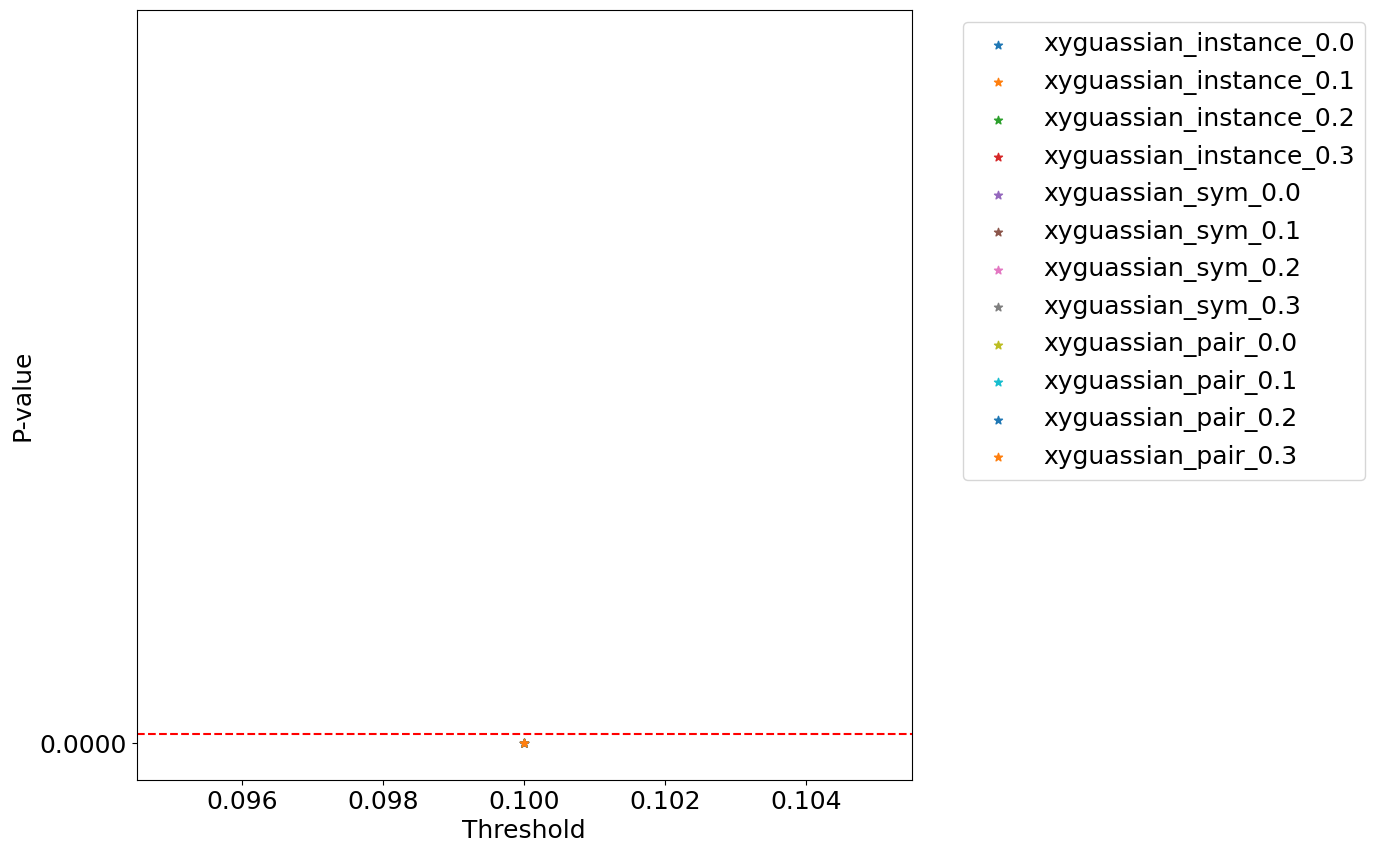

In [15]:
#  ,
#dataset_names=['breastcancer', 'wdbc', 'iris', 'letter', 'mushroom', 'segment',
    #    'sonar', 'vowel', 'xyguassian', 'yxguassian', 'balancescale',
    #    'krkp', 'waveform', 'splice', 'g241n','g241c', 'digit1', 'usps', 'coil',
    #    'coil2', 'bci', 'secstr', 'cifar10','splice2balance','xyguassian100','xyguassian200','xyguassian500','xyguassian5000','xyguassian1000','yxguassian100','yxguassian200','yxguassian500','yxguassian1000','yxguassian5000']

dataset_names =['pair0047','pair0070','pair0071','pair0107']

dataset_names =['krkp', 'waveform', 'splice', 'iris', 'secstr', 'wdbc', 'letter', 'mushroom', 'segment', 'coil', 'digit1', 'g241c', 'xyguassian', 'yxguassian']
#dataset_names=['krkp']
#dataset_names = corr_table_total['dataset'].unique()
noise_types = ['sym','instance','pair']
#noise_types = ['sym']
initial_noise_list = [0, 0.1,0.2,0.3]

corr_table_total2 = corr_table_total[corr_table_total['dataset'].isin(dataset_names) & corr_table_total['noise_type'].isin(noise_types) & corr_table_total['initial_noise'].isin(initial_noise_list)]
corr_table_total2['combine']=corr_table_total2['dataset']+'_'+corr_table_total2['noise_type']+'_'+corr_table_total2['initial_noise'].astype(str)


def check_string(string, word_list):
    return any(word in string for word in word_list)

#isCausal = ['krkp','xyguassian','secstr','splice']

isCausal = ['xyguassian']

plt.figure(figsize=(10, 10))

num_causal_success=0
num_anticausal_success=0

for group in corr_table_total2['combine'].unique():
    group_data = corr_table_total2[corr_table_total2['combine']==group].sort_values(by='threshold')
    # extract the first part of the combine separated bu '_'
    dataset_name_extract=(group_data['combine'].to_list()[0].split('_')[0])
    
    if (check_string(dataset_name_extract, isCausal)):
        #print(dataset_name_extract+" is causal")
        plt.plot(group_data['threshold'], group_data['p_value'], linestyle='--')
        plt.scatter(group_data['threshold'], group_data['p_value'], label=group, marker='*')
    else:
        
        print(dataset_name_extract+" is not causal")
        #plt.plot(group_data['threshold'], group_data['p_value'], linestyle='solid')
        #plt.scatter(group_data['threshold'], group_data['p_value'], label=group, marker='o')
# 设置坐标轴标签


plt.xlabel('Threshold')
plt.ylabel('P-value')
plt.ylim(-0.1,2)
plt.axhline(y=0.025, color='r', linestyle='--')
#plt.axvline(x=0.05, c='b', linestyle='--')

# 显示图例
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.legend(['Causal','Anti-causal','P-value=0.025'])
# save plot as pdf 
#plt.savefig('./results/pdf/pvalue_threshold.pdf')
# reverse y axis


# 显示图像
plt.show()



In [10]:
# select only dataset = splice
corr_table_total2.to_csv('./results/csv/pvalue_instance_injection.csv')

In [16]:
#corr_table_total2.to_csv('./results/csv/corr_table_allDataCombined.csv', index=False)

#drop duplicate based on combined column of corr_table_total2
corr_table_total3=corr_table_total2.drop_duplicates(subset=['combine'], keep='first')

# print row and column of corr_table_total2 and corr_table_total3
corr_table_total3.shape, corr_table_total2.shape, len(corr_table_total2['dataset'].unique())


corr_table_total3.to_csv('./results/csv/corr_table_instance_injection.csv')

In [105]:
corr_table_total2['dataset'].unique()

array(['xyguassian200', 'xyguassian500', 'xyguassian5000', 'xyguassian'],
      dtype=object)

In [227]:
import seaborn as sns
# read
df = pd.read_csv('./results/csv/pvalue_xyyx200-20000.csv')
#df2 = pd.read_csv('./results/csv/corr_table_allDataCombined_4digit.csv')
#df=pd.concat([df,df2])

dataset_names = ['xyguassian','xyguassian200','xyguassian1000','xyguassian5000','yxguassian','yxguassian200','yxguassian1000','yxguassian5000']
#,'secstr','splice']
#dataset_names = ['yxguassian200','yxguassian1000','yxguassian5000']
# select only initial noise = 0.0 and noise type is sym
df = df[ (df['dataset'].isin(dataset_names)) & ((df['initial_noise']!=0.9) ) & (df['noise_type']=='sym')]
df['dataset'].unique()


array(['xyguassian200', 'yxguassian200', 'xyguassian1000',
       'yxguassian1000', 'xyguassian5000', 'yxguassian5000', 'xyguassian',
       'yxguassian'], dtype=object)

<Figure size 2000x1000 with 0 Axes>

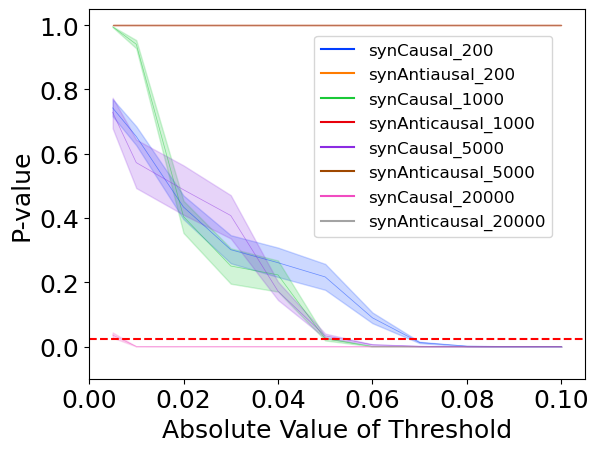

<Figure size 2000x1000 with 0 Axes>

In [235]:
# rename xyguassian as xyguassian20000
df['dataset'] = df['dataset'].replace('xyguassian', 'synCausal_20000')
df['dataset'] = df['dataset'].replace('xyguassian1000', 'synCausal_1000')
df['dataset'] = df['dataset'].replace('xyguassian200', 'synCausal_200')
df['dataset'] = df['dataset'].replace('xyguassian5000', 'synCausal_5000')
df['dataset'] = df['dataset'].replace('yxguassian5000', 'synAnticausal_5000')
df['dataset'] = df['dataset'].replace('yxguassian1000', 'synAnticausal_1000')
df['dataset'] = df['dataset'].replace('yxguassian200', 'synAntiausal_200')
df['dataset'] = df['dataset'].replace('yxguassian', 'synAnticausal_20000')
# df['dataset'] = df['dataset'].replace('krkp', 'KrKp')
#df['dataset'] = df['dataset'].replace('splice', 'Splice')
#df['dataset'] = df['dataset'].replace('secstr', 'SecStr')

# plot the data x is threshold, y is p_value, color is combined column, connected with lines
#sns.scatterplot(x="threshold", y="p_value", hue="dataset", data=df,  palette='bright', s=1, alpha=0.5, linewidth=0,legend=False)
sns.lineplot(x="threshold", y="p_value", hue="dataset", data=df, legend="auto",palette='bright',errorbar=('ci',95), err_style='band', markers=True, dashes=False, markersize=3, alpha=0.5, linewidth=0.5)

# plot a horizontal line at p_value = 0.025
plt.axhline(y=0.025, color='r', linestyle='--')

# move legend outside the plot, make the legend font smaller
plt.legend(loc='upper right',fontsize=12,bbox_to_anchor=(0.95, 0.95))
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
# rename legend for scatterplot
#plt.legend(labels=['1',"",'2'])
# rename x and y axis

plt.xlabel('Absolute Value of Threshold')

plt.ylabel('P-value')
# add annotation to the red dash line with an arrow pointing to it (red)
plt.xlim(0,0.105)
plt.ylim(-0.1,1.05)
#plt.annotate('P-value=0.025', xy=(0.055, 0.045), xytext=(0.045, 0.225), arrowprops=dict(facecolor='red', shrink=0.05))
plt.savefig('./results/pdf/pvalue_threshold_xyguassian.pdf',bbox_inches='tight')
plt.figure(figsize=(20, 10))


In [76]:
df

,Unnamed: 0,dataset,noise_type,initial_noise,slope,stderr,corr,threshold,p_value,combine
132,NaN,KrKp,instance,0.0,0.019484,0.004152,0.871103,0.1,0.0,krkp_instance_0.0
133,NaN,KrKp,instance,0.1,0.011085,0.006909,0.518551,0.1,0.0,krkp_instance_0.1
134,NaN,KrKp,instance,0.2,0.017449,0.006222,0.727410,0.1,0.0,krkp_instance_0.2
135,NaN,KrKp,instance,0.3,0.022092,0.006287,0.798868,0.1,0.0,krkp_instance_0.3
136,NaN,KrKp,sym,0.0,0.003417,0.004128,0.298559,0.1,0.0,krkp_sym_0.0
...,...,...,...,...,...,...,...,...,...,...
139,NaN,KrKp,sym,0.3,0.011920,0.005958,0.603109,0.1,0.0,krkp_sym_0.3
140,NaN,KrKp,pair,0.0,0.003417,0.004128,0.298559,0.1,0.0,krkp_pair_0.0
141,NaN,KrKp,pair,0.1,0.015363,0.003249,0.872690,0.1,0.0,krkp_pair_0.1
142,NaN,KrKp,pair,0.2,0.016249,0.002111,0.945674,0.1,0.0,krkp_pair_0.2


# overleaf table generator

In [17]:
df3=corr_table_total3.copy()
df3['slope']=df3['slope'].round(4).astype(str)
df3['stderr']=df3['stderr'].round(4).astype(str)

df3['output'] = "\makecell{"+df3['slope'] +'$\pm$'+ df3['stderr']+ '\\\\ p='+df3['p_value']+"} &"

df3=df3.drop(['slope','stderr','p_value','threshold','corr','combine'],axis=1)
df4=df3.groupby(['dataset','noise_type','initial_noise']).first().reset_index()
# convert df4 to multiindex
df4 = df4.set_index(['dataset','noise_type','initial_noise'])
# exchange columns and rows
df4 = df4.unstack(level=1)
df4 =df4.unstack(level=1)
df4.to_csv('./results/csv/table/corr_OVERLEAF_instance_injection.csv')
df4

output  \
noise_type                                       instance   
initial_noise                                         0.0   
dataset                                                     
coil            \makecell{0.2467$\pm$0.0049\\ p=1.0000} &   
digit1          \makecell{0.7042$\pm$0.0096\\ p=1.0000} &   
g241c           \makecell{0.3316$\pm$0.0049\\ p=1.0000} &   
iris             \makecell{0.6624$\pm$0.031\\ p=1.0000} &   
krkp            \makecell{0.0088$\pm$0.0017\\ p=0.0000} &   
letter          \makecell{0.2152$\pm$0.0024\\ p=1.0000} &   
mushroom         \makecell{0.656$\pm$0.0079\\ p=1.0000} &   
secstr          \makecell{0.0392$\pm$0.0013\\ p=0.0000} &   
segment          \makecell{0.4133$\pm$0.014\\ p=1.0000} &   
splice          \makecell{0.0417$\pm$0.0069\\ p=0.0000} &   
waveform        \makecell{0.2835$\pm$0.0066\\ p=1.0000} &   
wdbc            \makecell{0.6809$\pm$0.0121\\ p=1.0000} &   
xyguassian     \makecell{-0.0045$\pm$0.0024\\ p=0.0000} &   
yxguassian      \makecell{0.7081$\pm$0.0086\\ p=1.0000} &   

                                                           \
noise_type                                                  
initial_noise                                         0.1   
dataset                                                     
coil            \makecell{0.2467$\pm$0.0049\\ p=1.0000} &   
digit1          \makecell{0.7042$\pm$0.0096\\ p=1.0000} &   
g241c           \makecell{0.3316$\pm$0.0049\\ p=1.0000} &   
iris             \makecell{0.6624$\pm$0.031\\ p=1.0000} &   
krkp           \makecell{-0.0081$\pm$0.0023\\ p=0.0000} &   
letter          \makecell{0.2145$\pm$0.0025\\ p=1.0000} &   
mushroom         \makecell{0.656$\pm$0.0079\\ p=1.0000} &   
secstr          \makecell{0.0392$\pm$0.0013\\ p=0.0000} &   
segment          \makecell{0.4133$\pm$0.014\\ p=1.0000} &   
splice          \makecell{0.0087$\pm$0.0045\\ p=0.0000} &   
waveform        \makecell{0.2835$\pm$0.0066\\ p=1.0000} &   
wdbc            \makecell{0.6809$\pm$0.0121\\ p=1.0000} &   
xyguassian     \makecell{-0.0042$\pm$0.0016\\ p=0.0000} &   
yxguassian      \makecell{0.7081$\pm$0.0086\\ p=1.0000} &   

                                                           \
noise_type                                                  
initial_noise                                         0.2   
dataset                                                     
coil            \makecell{0.2499$\pm$0.0051\\ p=1.0000} &   
digit1          \makecell{0.7042$\pm$0.0096\\ p=1.0000} &   
g241c           \makecell{0.3316$\pm$0.0049\\ p=1.0000} &   
iris             \makecell{0.6624$\pm$0.031\\ p=1.0000} &   
krkp           \makecell{-0.0081$\pm$0.0023\\ p=0.0000} &   
letter           \makecell{0.217$\pm$0.0025\\ p=1.0000} &   
mushroom         \makecell{0.656$\pm$0.0079\\ p=1.0000} &   
secstr          \makecell{0.0391$\pm$0.0012\\ p=0.0000} &   
segment         \makecell{0.4054$\pm$0.0187\\ p=1.0000} &   
splice          \makecell{0.0553$\pm$0.0057\\ p=0.0000} &   
waveform         \makecell{0.2758$\pm$0.011\\ p=1.0000} &   
wdbc            \makecell{0.6809$\pm$0.0121\\ p=1.0000} &   
xyguassian     \makecell{-0.0042$\pm$0.0016\\ p=0.0000} &   
yxguassian      \makecell{0.7081$\pm$0.0086\\ p=1.0000} &   

                                                           \
noise_type                                                  
initial_noise                                         0.3   
dataset                                                     
coil            \makecell{0.2514$\pm$0.0056\\ p=1.0000} &   
digit1          \makecell{0.7042$\pm$0.0096\\ p=1.0000} &   
g241c           \makecell{0.3304$\pm$0.0053\\ p=1.0000} &   
iris             \makecell{0.6624$\pm$0.031\\ p=1.0000} &   
krkp           \makecell{-0.0081$\pm$0.0023\\ p=0.0000} &   
letter            \makecell{0.21$\pm$0.0024\\ p=1.0000} &   
mushroom         \makecell{0.656$\pm$0.0079\\ p=1.0000} &   
secstr          \makecell{0.0392$\pm$0.0013\\ p=0.0000} &   
segment         \makec

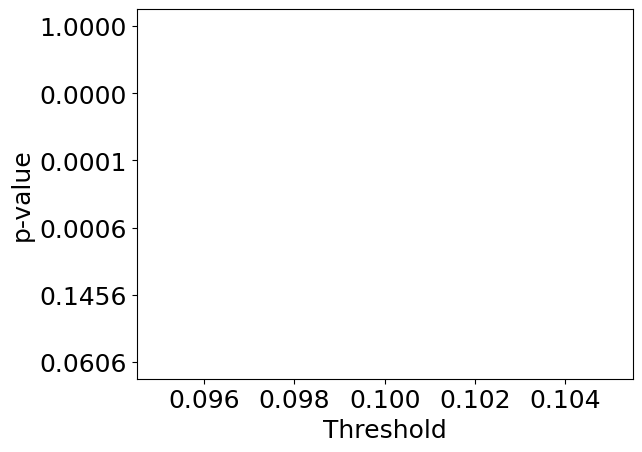

In [164]:
#plot threshold vs p-value for each dataset
# dataset_names = corr_table_total['dataset'].unique()
# noise_types = corr_table_total['noise_type'].unique()
# initial_noise_list = corr_table_total['initial_noise'].unique()


corr_table_total['combine']=corr_table_total['dataset']+'_'+corr_table_total['noise_type']+'_'+corr_table_total['initial_noise'].astype(str)
#corr_table_total.set_index(['dataset', 'noise_type', 'initial_noise'], inplace=True)
#corr_table_total.groupby('combine').plot(x='threshold', y='p_value', kind='line', title='threshold vs p-value')
# Create the plot
fig, ax = plt.subplots()
for combination, group in corr_table_total.groupby(level=0):
    ax.plot(group['threshold'], group['p_value'], label=combination)
ax.set_xlabel('Threshold')
ax.set_ylabel('p-value')

# Show the plot
plt.show()  

In [ ]:
corr_table_total['combined']= corr_table_total['dataset']+'_'+corr_table_total['noise_type']+'_'+corr_table_total['initial_noise'].astype(str)
x=corr_table_total['threshold']
y=corr_table_total['p_value']
col=corr_table_total['combined']


In [ ]:
#plot threshold vs p-value for each dataset
corr_table_total.groupby(['dataset','noise_type','initial_noise']).plot(x='threshold', y='p_value', style='o')

In [ ]:
#plot threshold vs p-value for each dataset
corr_table_total.groupby(['dataset','noise_type','initial_noise']).plot(x='threshold', y='p_value', style='o')

In [ ]:
#plot threshold vs p-value for each dataset
corr_table_total.groupby(['dataset','noise_type','initial_noise']).plot(x='threshold', y='p_value', style='o')

In [47]:
corr_table_total_groupby

,dataset,noise_type,initial_noise,threshold,corr,p_value
0,krkp,instance,0.0,0.005,0.871103,9.958926e-01
1,krkp,instance,0.0,0.010,0.871103,9.741383e-01
2,krkp,instance,0.0,0.020,0.871103,4.520368e-01
3,krkp,instance,0.0,0.030,0.871103,1.754342e-02
4,krkp,instance,0.0,0.040,0.871103,5.662736e-04
...,...,...,...,...,...,...
157,xyguassian,sym,0.4,0.010,0.437518,1.545184e-04
158,xyguassian,sym,0.4,0.020,0.437518,4.687195e-07
159,xyguassian,sym,0.4,0.030,0.437518,1.555860e-08
160,xyguassian,sym,0.4,0.040,0.437518,1.418862e-09


,dataset,noise_type,initial_noise,corr,threshold,p_value
0,krkp,instance,0.0,0.871103,0.05,3.995215e-05
1,krkp,instance,0.2,0.727410,0.05,3.954928e-04
2,krkp,instance,0.4,0.899141,0.05,4.294168e-04
3,krkp,sym,0.0,0.298559,0.05,1.710691e-06
4,krkp,sym,0.2,0.945674,0.05,1.175942e-07
...,...,...,...,...,...,...
15,krkp,pair,0.0,0.298559,0.04,1.038179e-05
16,krkp,pair,0.2,0.945674,0.04,1.752064e-06
17,krkp,pair,0.4,0.877720,0.04,7.531248e-06
18,krkp,instance,0.0,0.871103,0.03,1.754342e-02


In [31]:
corr_table

,dataset,noise_type,initial_noise,corr,threshold,p_value
0,krkp,instance,0.0,0.871103,0.005,0.995893
1,krkp,instance,0.2,0.727410,0.005,0.959803
2,krkp,instance,0.4,0.899141,0.005,0.998819
3,krkp,sym,0.0,0.298559,0.005,0.355668
4,krkp,sym,0.2,0.945674,0.005,0.999648
5,krkp,sym,0.4,0.877720,0.005,0.992481
6,krkp,pair,0.0,0.298559,0.005,0.355668
7,krkp,pair,0.2,0.945674,0.005,0.999648
8,krkp,pair,0.4,0.877720,0.005,0.992481


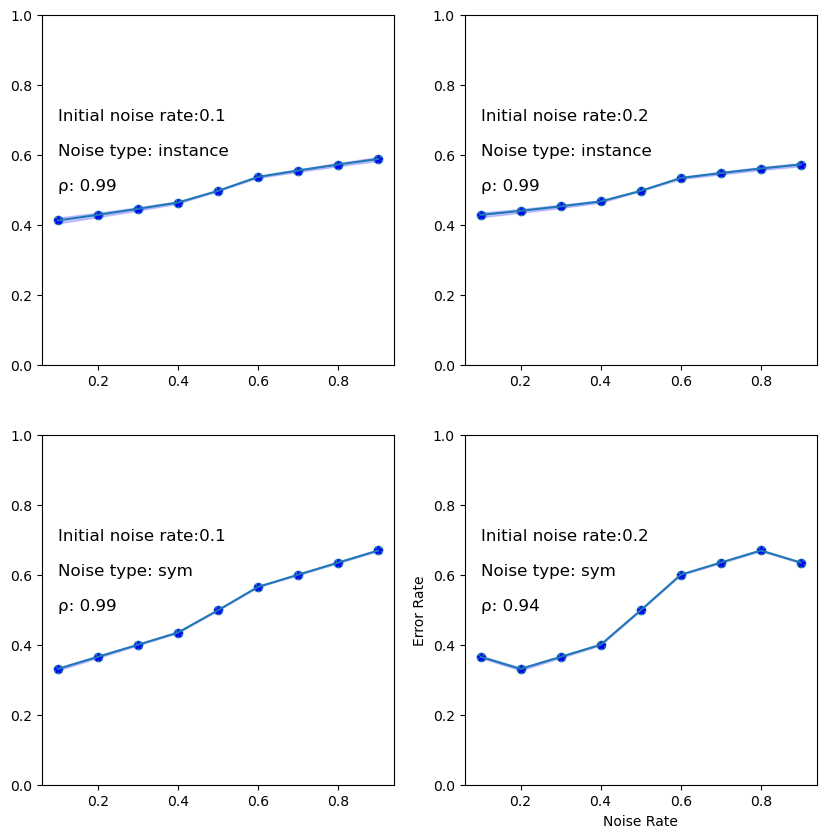

In [232]:
noise_type_list = ["instance","sym"]
initial_noise_list = [0.1,0.2]
df = pd.read_csv("./results/xyguassian_groupby.csv")

fig, axs = plt.subplots(2,2, figsize=(10, 10))
num_plots = len(noise_type_list)*len(initial_noise_list)
nrows = 2
ncols = int(num_plots/nrows)
i=0
j=0
for noise_type in noise_type_list:
    for initial_noise in initial_noise_list:
        
        df_temp = df[(df['noise_type']==noise_type) & (df['initial_noise']==initial_noise)]
        x=df_temp['noise_rate']
        y =df_temp['mean']
        y_std = df_temp['std']
        
        # Define the confidence interval
        ci = 0.1 * y_std / y
        # calculate correlation coefficient
        corr = np.corrcoef(x, y)[0, 1]


        axs[i,j].scatter(x, y, label=noise_type)     
        axs[i,j].plot(x, y, '*', color='blue')
        axs[i,j].text(x=0.1, y=0.5,s='\n\nInitial noise rate:'+str(initial_noise)+'\n\nNoise type: '+ noise_type+'\n\n\u03C1: '+str(round(corr,2)), fontsize=12)
        axs[i,j].plot(x,y)
        axs[i,j].set_ylim(0,1)
        plt.xlabel('Noise Rate')
        plt.ylabel('Error Rate')
        # Plot the confidence interval
        axs[i,j].fill_between(x, (y-ci), (y+ci), color='blue', alpha=0.2)
        #axs[i,j].savefig('./results/xyguassian_'+noise_type+'_'+str(initial_noise)+'.png')
            
        j+=1
        if j==ncols:
            i+=1
            j=0
        
plt.savefig('./results/xyguassian.png')

In [15]:
# if dataset in "krkp", "balancescale", "splice", "xyguassian" then it is causal
df['causal'] = df['dataset'].apply(lambda x: 1 if x in ["krkp", "balancescale", "splice","xyguassian"] else 0)

df.to_csv('./results/results_method1_error_rate2.csv', index=False)

# New dataset

breast-cancer-wisconsin

In [9]:
df = pd.read_csv('./datasets/wdbc/wdbc.data',header=None)

# recode the class labels maelignant as 1 and benign as 0
df[1] = df[1].apply(lambda x: 1 if x=='M' else 0)
# drop the first column
df.drop(df.columns[0], axis=1, inplace=True)
# move the class label to the last column

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
